In [278]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### Data Overview

In [279]:
# load dataset
df = pd.read_excel('social_data.xlsx')
df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text


In [280]:
# statistical overview
df.describe()

,Total Impressions,Total Engagements
count,3479.000000,3479.000000
mean,10972.453579,947.390629
std,29577.108063,3468.628038
min,0.000000,0.000000
25%,167.000000,0.000000
50%,1884.000000,39.000000
75%,12467.000000,276.500000
max,753227.000000,95062.000000


In [281]:
# checking null 
df.isnull().sum()

Published Date       0
Account              0
Account Type         0
Campaign Name        0
Total Impressions    0
Total Engagements    0
Media Type           0
dtype: int64

In [282]:
# creating a column for engagement rate
df1 = df.copy()
df1['Engagement Rate'] = df1['Total Engagements']/df1['Total Impressions']

# identify outliers: engagement rate >= 1
outliers = df1[df1['Engagement Rate']>=1]
outliers

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
837,2023-03-10 12:37:06,General,FBPAGE,N/A,1,940,Photo,940.000000
1586,2023-02-23 06:18:27,General,FBPAGE,N/A,1,1,Photo,1.000000
3216,2023-01-19 06:02:34,General,FBPAGE,N/A,5,44,Photo,8.800000
3457,2023-01-05 11:55:44,General,FBPAGE,N/A,300,3776,Photo,12.586667


In [283]:
# removing outliers
df1 = df1.drop([837, 1586, 3216, 3457])

### Question 1. 
#### 1.1 Typical Engagement Rate

In [284]:
# calculating typical engagement rate / overall engagement rate
typical_engagement_rate = df1['Total Engagements'].sum()/df1['Total Impressions'].sum()

print("The typical engagement rate we can expect is ", typical_engagement_rate)

The typical engagement rate we can expect is  0.0862186141205719


#### 1.2 Likelihood of 15% Engagement Rate

In [285]:
# engagement rate larger than 15%
engage_15 = df1[df1['Engagement Rate'] >= 0.15]
likelihood = len(engage_15)/len(df1)

print("There are in total ",len(engage_15)," observations with engagement rates larger than 15%, \
and the likelihood that we can achieve a 15% engagement rate is ", format(likelihood*100, '.2f'), '%')

There are in total  222  observations with engagement rates larger than 15%, and the likelihood that we can achieve a 15% engagement rate is  6.39 %


### Question 2. 
#### 2.1 Effects of Day of the Week  

In [286]:
# total engagements/total impressions
df2 = df.copy()

# remove outliers
df2 = df2.drop([837, 1586, 3216, 3457])

# creating a column for weekdays
df2['Weekday'] = [i.weekday() for i in df2['Published Date']]
weekday = df2.groupby('Weekday').sum()
weekday['Engagement Rate'] = weekday['Total Engagements']/weekday['Total Impressions']
weekday

,Total Impressions,Total Engagements,Engagement Rate
Weekday,,,
0,2476029,166279,0.067156
1,7197026,731487,0.101637
2,5736454,448516,0.078187
3,8522398,761099,0.089306
4,7481112,641656,0.085770
5,3028493,146694,0.048438
6,3731347,395480,0.105989


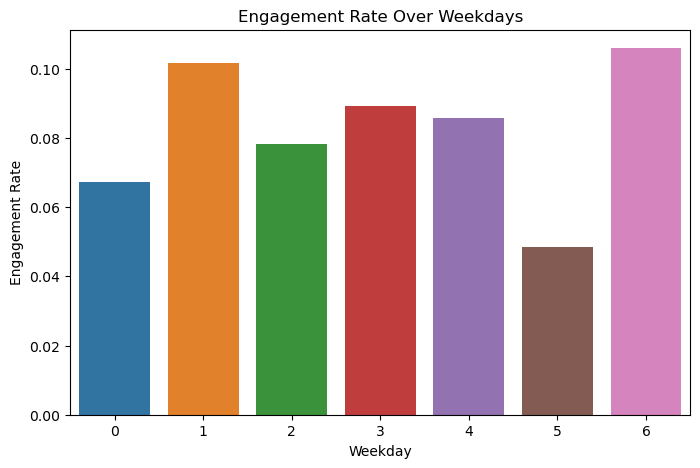

In [287]:
plt.figure(figsize = (8, 5))
sns.barplot(x = weekday.index, y = weekday['Engagement Rate'])
plt.title('Engagement Rate Over Weekdays')
plt.show()

1. Monday (day 0): With an engagement rate of 0.067156, Monday sees a substantial level of user engagement despite having the lowest total impressions (2,476,029). This suggests that while fewer users are exposed to content on Mondays, those who do interact show a decent level of engagement.

2. Tuesday (day 1): The engagement rate for Tuesday is 0.101637, one of the highest of the week. Coupled with the third-highest total impressions (7,197,026), this indicates that content posted on Tuesdays not only reaches a large number of users but also elicits a high level of engagement, suggesting that users are particularly active and receptive on this day.

3. Wednesday (day 2): Despite having relatively low total impressions (5,736,454), Wednesday manages a moderate engagement rate of 0.078187, demonstrating that users are still relatively engaged on this day.

4. Thursday (day 3): Even though Thursday leads in total impressions (8,522,704) and total engagements (764,920), it doesn't top the list in terms of engagement rate, which is outperformed by Tuesday and Sunday. This indicates that, although a large number of users view the content on Thursdays, the conversion from impressions to engagements is not as efficient as on Tuesdays and Sundays.

5. Friday (day 4): With a robust engagement rate of 0.085896, Friday proves that despite the nearing weekend, users remain actively engaged. The high number of total impressions (7,481,113) and significant total engagements (642,596) underline this fact.

6. Saturday (day 5): Saturday experiences the week's lowest engagement rate of 0.048438 and also records the lowest total engagements (146,694). This suggests that users are generally less active and engaged on Saturdays, even though the total impressions are not the lowest.

7. Sunday (day 6): Sunday excels in engaging users, achieving the week's highest engagement rate of 0.105989 despite having a moderate total of impressions (3,731,347). This implies that users are particularly responsive on Sundays, leading to a high total engagement count (395,480).

In conclusion, engagement rates clearly fluctuate throughout the week, suggesting distinct user behavior patterns depending on the day. The data reveals that Sunday and Tuesday are the most engaging days, with the highest engagement rates of 0.105989 and 0.101637 respectively. On the other hand, Saturday marks the lowest engagement rate at 0.048438, suggesting reduced user interaction. 

#### 2.2 Effect of Posting Time  
4 time sections: 5-9 Early Morning 9-12 Morning; 12-14 Noon; 14-19 Afternoon; 19-5 Night

In [288]:
# creating a column for posting hours
df2['posting_hour'] = [i.hour for i in df2['Published Date']]

# creating a column for time of a day
def categorise(row):
    if (row['posting_hour'] >= 5) & (row['posting_hour'] < 9):
        return 'Early Morning'
    elif (row['posting_hour'] >= 9) & (row['posting_hour'] <12):
        return 'Morning'
    elif (row['posting_hour'] >= 12) & (row['posting_hour'] < 14):
        return 'Noon'
    elif (row['posting_hour'] >= 14) & (row['posting_hour'] < 19):
        return 'Afternoon'
    elif (row['posting_hour'] >= 19) | (row['posting_hour'] < 5):
        return 'Night'
    
df2['time_of_day'] = df2.apply(lambda row: categorise(row), axis = 1)
df2.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Weekday,posting_hour,time_of_day
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,4,19,Night
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,4,19,Night
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,4,19,Night
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,4,19,Night
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,4,19,Night


In [289]:
hrs = df2.groupby('posting_hour').sum()
hrs['Engagement Rate'] = hrs['Total Engagements']/hrs['Total Impressions']
hrs

,Total Impressions,Total Engagements,Weekday,Engagement Rate
posting_hour,,,,
0,0,0,4,NaN
2,32613,274,1,0.008402
3,66113,5114,24,0.077352
4,46270,4135,35,0.089367
5,342095,89914,96,0.262833
6,724657,58476,260,0.080695
7,1059382,151929,435,0.143413
8,1901692,198343,496,0.104298
9,5292903,467383,1075,0.088304


1. The highest engagement rate is seen at 5 am (0.262833), followed by 7 am (0.143413). This could suggest that users are more likely to engage with content in the early morning.

2. 8 am, 4 pm, and 6 pm also have relatively high engagement rates, indicating that these times might also be effective for posting.

3. Despite the volume of total impressions being substantial during the hours of 9 am to 4 pm, the engagement rates aren't consistently high. For instance, 10 am and 3 pm exhibit lower engagement rates of 0.065452 and 0.069183 respectively, suggesting that high visibility doesn't always translate to high engagement.

4. The lowest engagement rate is at midnight (NaN, due to zero impressions and engagements), followed by 11 pm (0.007063) and 2 am (0.008402). This suggests that user engagement tends to be significantly lower during late-night hours.

5. Engagement rate tends to peak at 5 am, then declines gradually throughout the day, with a minor resurgence in the afternoon (4 pm to 6 pm), before dropping off again in the evening.

In conclusion, while content visibility (total impressions) tends to be high during the daytime, the most significant user engagement (as measured by engagement rates) is seen in the early morning hours. 

In [290]:
time = df2.groupby('time_of_day').sum()
time['Engagement Rate'] = time['Total Engagements']/time['Total Impressions']
time

,Total Impressions,Total Engagements,Weekday,posting_hour,Engagement Rate
time_of_day,,,,,
Afternoon,13867434,1294920,4083,19794,0.093378
Early Morning,4027826,498662,1287,2883,0.123804
Morning,13719141,1034056,2865,10187,0.075373
Night,745583,50773,444,2328,0.068098
Noon,5812875,412800,1820,8036,0.071015


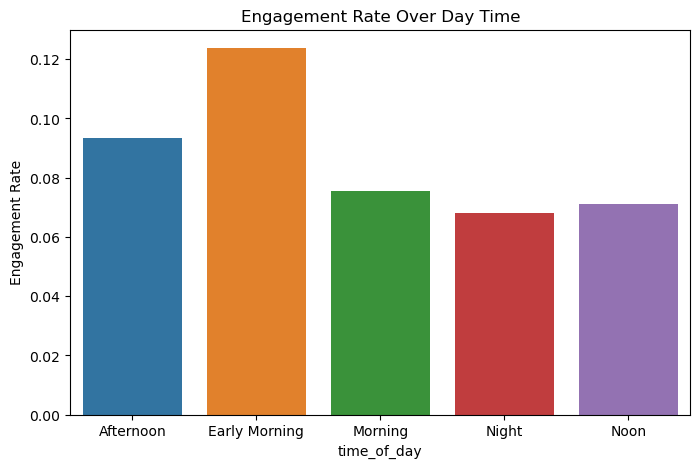

In [291]:
plt.figure(figsize = (8, 5))
sns.barplot(x = time.index, y = time['Engagement Rate'])
plt.title('Engagement Rate Over Day Time')
plt.show()

1. Early Morning: This period, which might include the hours around 5 am (as suggested by previous data), shows a high engagement rate of 0.123815. Even though it records fewer total impressions compared to other times of day (4,027,832), early morning posts result in substantial total engagements (498,707). This aligns with the previous findings that highlighted a peak in engagement rate at 5 am.

2. Morning: The morning period demonstrates a lower engagement rate of 0.075647, despite higher total impressions (13,719,441). This could correlate with the earlier finding that engagement rates tend to drop after the early morning peak, specifically around 9 am to 11 am.

3. Afternoon: The afternoon period sees a noticeable increase in engagement rate to 0.093378, coinciding with the previous finding that there is a minor resurgence of engagement rates in the afternoon hours (around 4 pm).

4. Noon: The engagement rate during noon is 0.071176. Although there's a high number of total impressions (5,812,876), the conversion to engagements isn't as high, suggesting the trend of the mid-day slump continues.

5. Night: The night period shows the lowest engagement rate at 0.068098, which corresponds with the previous conclusion that engagement rates are significantly lower during late-night hours, specifically around 11 pm and midnight.

In conclusion, the engagement rate seems to peak during the early morning, declines throughout the day, and then sees a slight increase in the afternoon before dropping off again during the night. 

### Question 3.

In [292]:
# group on Account (game titles)
df2.loc[df2['Account'] == 'General', 'Account'] = 'General '
acct = df2.groupby('Account').sum()
acct['Engagement Rate'] = acct['Total Engagements']/acct['Total Impressions']
acct

,Total Impressions,Total Engagements,Weekday,posting_hour,Engagement Rate
Account,,,,,
CSGO,2313918,92336,712,3538,0.039905
Content Creators,45186,1387,138,685,0.030695
DOTA2,1859326,123990,2528,9877,0.066685
General,33931450,3072567,6953,28437,0.090552
Valorant,22979,931,168,691,0.040515


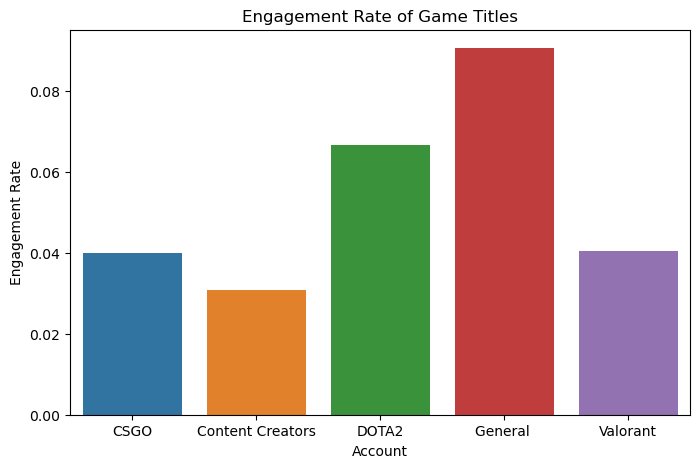

In [293]:
plt.figure(figsize = (8, 5))
sns.barplot(x = acct.index, y = acct['Engagement Rate'])
plt.title('Engagement Rate of Game Titles')
plt.show()

1. CSGO: This game has the highest total impressions (2,313,918) among the individual game titles listed. However, its engagement rate stands at 0.039905, which is slightly lower than average. While the game is widely seen, it may not be as effective at driving user engagement.

2. Content Creators: This category has significantly lower total impressions (45,186) and the lowest engagement rate (0.030695) among the listed titles. It seems that this content is not gaining as much attention or engagement as the other categories.

3. DOTA2: Despite having lower total impressions than CSGO (1,859,326), DOTA2 has a higher engagement rate (0.066685). This suggests that while DOTA2 might not reach as many users as CSGO, those who do see the content are more likely to engage.

4. General: This category, presumably including posts not specific to a game title, exhibits the highest total impressions (33,931,757) and the highest engagement rate (0.090692). This indicates that generic content or content that spans multiple games tends to perform better both in reach and engagement.

5. Valorant: While Valorant has the lowest total impressions (22,979), it has a decent engagement rate (0.040515), higher than that of Content Creators. Even though the content doesn't reach a large audience, it still manages to engage a respectable proportion of those it does reach.

In summary, while the 'General' category performs best in terms of both reach and engagement, among the specific game titles, DOTA2 demonstrates a better balance of reach and engagement. CSGO, despite having a high reach, doesn't engage as high a proportion of its audience. Valorant and Content Creators have room for improvement in terms of expanding their reach, although Valorant does better in engaging its audience. 

If we are to focus on individual games, we could focus more on DOTA2. Despite having lower total impressions than CSGO, DOTA2 performs significantly better in terms of engagement rate. This suggests that DOTA2's content resonates with its audience, leading to higher interaction. Increasing the reach of DOTA2 content could further improve its overall social performance.

### Question 4. 

In [294]:
media = df2.groupby('Media Type').sum()[['Total Impressions', 'Total Engagements']]
media['Engagement Rate'] = media['Total Engagements']/media['Total Impressions']
media

,Total Impressions,Total Engagements,Engagement Rate
Media Type,,,
Album,20,8,0.400000
Carousel,160689,6541,0.040706
Link,232465,2257,0.009709
Mixed,184984,13664,0.073866
Photo,23893685,2162978,0.090525
Text,3106203,246312,0.079297
Video,10594813,859451,0.081120


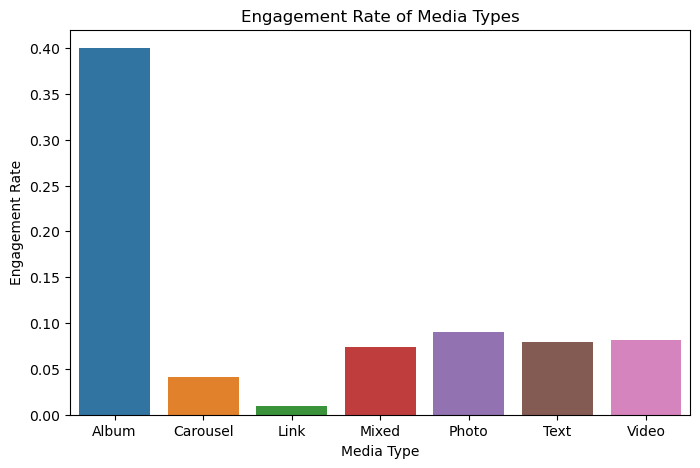

In [295]:
plt.figure(figsize = (8, 5))
sns.barplot(x = media.index, y = media['Engagement Rate'])
plt.title('Engagement Rate of Media Types')
plt.show()

The media type with the highest engagement rate is "Album" at a rate of 0.4. However, the total impressions and total engagements for this category are significantly lower than other types. This could mean that while the "Album" type has a higher engagement rate, its overall impact is likely limited due to fewer impressions and engagements.

On the other hand, "Photo" has the highest total impressions (23,893,992) and the second highest engagement rate (0.090723). This indicates that it's not only reaching a vast audience but also resonating well with viewers, leading to a high number of total engagements (2,167,739).

"Video" media type also shows strong performance with the third highest engagement rate (0.081120) and also maintains a high level of total impressions (10,594,813) and total engagements (859,451).

So, if the focus is purely on engagement rate, "Album" performs the best. However, if consider the balance between reach (impressions) and engagement, "Photo" and "Video" types are the top performers. In terms of overall social impact, focusing more on "Photo" and "Video" content would likely yield better results.

### Question 5.

In [296]:
cp = df2.groupby('Campaign Name').sum()[['Total Impressions', 'Total Engagements']]
cp['Engagement Rate'] = cp['Total Engagements']/cp['Total Impressions']
cp

,Total Impressions,Total Engagements,Engagement Rate
Campaign Name,,,
Community Engagement,23803756,2044767,0.085901
Evergreen,1328729,43127,0.032457
Evil Exhibited,5742595,185305,0.032269
N/A,7297779,1018012,0.139496


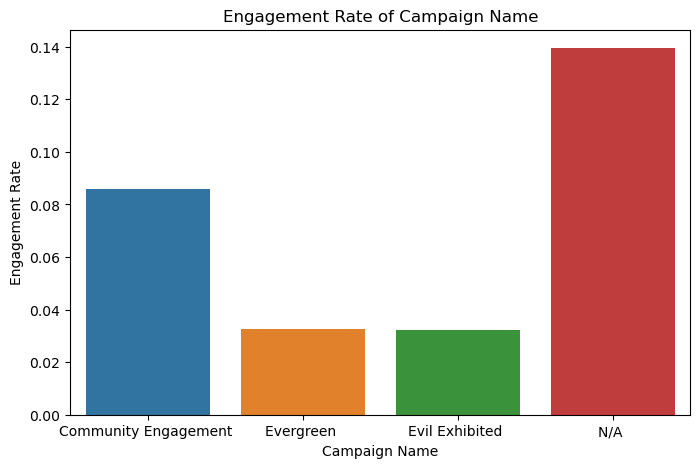

In [297]:
plt.figure(figsize = (8, 5))
sns.barplot(x = cp.index, y = cp['Engagement Rate'])
plt.title('Engagement Rate of Campaign Name')
plt.show()

The "N/A" campaign is performing the best with an engagement rate of 0.140143, which is significantly higher than the other campaigns. However, it's important to note that the name "N/A" implies that this category might include a mix of different campaigns or non-campaign posts.

Among the campaigns with specific names, the "Community Engagement" campaign is performing the best, with highest engagement rates (0.0859) and highest number of total engagements and total impressions..

It's worth noting that while "Evergreen" and "Evil Exhibited" have significantly lower engagement rates and total engagements, they also have lower total impressions, indicating that they may not have been as widely circulated or that they cater to a more specific audience.

### Question 6. 

Given the insights gathered from the previous analyses, a posting strategy for social channels could be as follows:

1. Posting Time: The data suggests that the time of day has a significant impact on engagement rates. The early morning hours (5-9 am) seem to yield the highest engagement rate. It would be ideal to schedule key posts during early morning hours, while also ensuring regular posts during other high engagement periods such as afternoon.

2. Day of the Week: Sunday and Tuesday are the days with the highest engagement rates. Focusing on these days for key posts or announcements can boost engagement.

3. Game Titles: While 'General' content performs well in terms of total engagements and impressions, specific game titles like 'DOTA2' has significant engagement rates as well. This suggests that content could be tailored towards these games on the days and times when engagement is typically high.

4. Media Type: ’Album' media type performs exceptionally well with an above average engagement rate of 0.4 However, 'Album's total number of impressions and engagements are significantly lower than other categories', which shows potential limitations of this media type in reaching and engaging audiences. In this case, 'Photo', the media type with the second-highest engagement rates, could be used as the main media type for promoting on social media. 

5. Campaigns: 'Community Engagement' campaigns show strong performance. While it might be beneficial to investigate what is driving the high engagement rate of the 'N/A' campaign, focusing on community engagement content can enhance performance given its solid impression count and engagement rate.

### Question 7.

1. Market Entry Analysis：  
Before expanding other content or channels to the existing strategy, I would suggest the social media team conduct a competitive analysis on how those new contents perform on other platform; If those content perform bad, maybe there is less headroom or opportunities for us to introduction them into our platform 
2. User Profiling：   
It is super valuable for the social media team to have a deep and comprehensive understanding of the targeted users. For example, we can conduct a user segmentation using clustering to identify different user cohorts, maybe some users prefer CSGO youtube channel, some users prefer to explore something new; In this case, we can design personalized promotion strategy to improve the relevance of our recommendation   
